# **Exercise Results**
* ## This year no solution uploaded
* ## Showing the best solutions found in the previous year


---

* ### Student group: XXX
* ### **Features**: split model selection in consecutive steps with estimation of hyper-paramenters. 2-Fold CV Setting
* ### **Best Configuration**:
   * nhid1 = 100,
   * nhid2= 75,
   * learning_rate=0.0001,
   * weight_reg= None,
   * hid_act='relu',
   * dropout: 0.2,
   * loss: 'sparse_categorical_crossentropy'  
* ### **Test Accuracy**: 0.9779
---
* ### Group 2 XXX
* **No MLP used**
---
* ### Group 3: XXX
* ### **Features**: 2-Fold CV Setting for GridSearch, but evaluated in 5-fold CV setting not holdout (train/test provided). Optimizer included in the grid. Input MinMan scaler in bins.
* **Best Configuration**
    * nhid_list = [1024, 512],
    * batch_size = 256,
    * epochs = 50,
    * model__optimizer = Adam(learning_rate=10**-4),
    * model__weight_reg = None,
    * model__dropout_rate = 0.2
* ### **Test Accuracy**: 0.9836
---  
* ### Group 4: XXX
* ### **Features**, optimizer optimization,  
* **Best Configuration**
    * units: 512
    * activation: relu
    * weight_reg: none
    * dropout_rate: 0.0
    * lr: 0.001
    * optimizer: rmsprop
* ### **Test Accuracy**: 0.9749    
---
* ### Group 5: XXX
* ### **Test Accuracy**: 0.9539
---
* ### Group 6: XXX
* ### **Features**: split model selection in consecutive steps with subestimation of hyper-paramenters
* **Best Configuration**:
    * nhid1 = 200,
    * nhid2= 75,
    * epochs=30,
    * batch_size = 10,
    * learning_rate= 0.001,
    * weight_reg= 'l2',
    * hid_act= 'relu',
    * out_act= 'softmax',
    * dropout_rate= 0,
    * loss=sparse_categorical_crossentropy
* ### **Test Accuracy**: 0.9757  
---
* ### Group 7: XXX
* **Best Configuration**:
    * Optimizer: RMSprop
    * Learning Rate: LearningRateScheduler
    * Dropout Rate: 0.2
    * Dense Layer Sizes: [1024,1024,1024]
    * Epochs: 15  
* ### **Test Accuracy**: 0.9853    

# Best performance in literature on MNIST: [papers with code](https://paperswithcode.com/sota/image-classification-on-mnist)

# **Comments on the assigment**
* ### In general solved correctly
* ### Pay attention to define your hyperparameters as arguments (used) of your model
* ### If we already have a train and test setting (holdout, like for MNIST), we do not need to perform an outer CV to select the model parameters (just that one performed by the gridSearchCV is necessary -- inner CV)

# **Let's build a CNN to classify MNIST data**

* # We first import MNIST data

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
# dense is a fully connected layer
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler, MinMaxScaler
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape:{X_train.shape},\
    X_train type :{type(X_train)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train.shape:(60000, 28, 28),    X_train type :<class 'numpy.ndarray'>


* # Let's evaluate if we need to normalize images
 * ## Pixels are spatially related, normalizing by columns can be deleterious

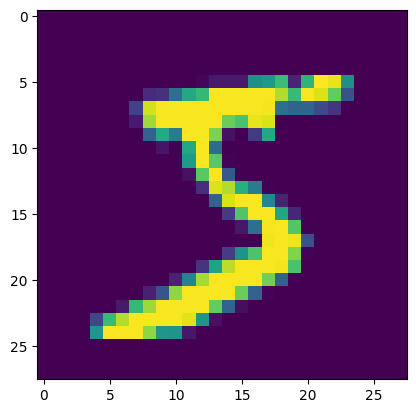

In [ ]:
plt.imshow(X_train[0])

(28, 28)
np.max(newX0):1.0, np.max(X_train[0]):255


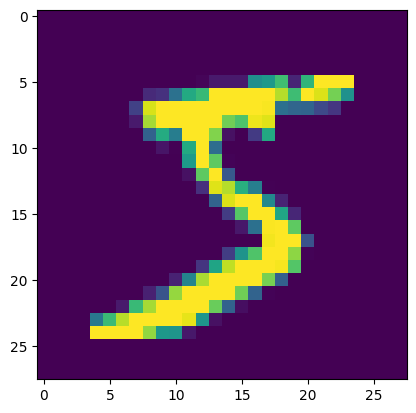

In [ ]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train[0])

newX0 = mmscaler.transform(X_train[0])
print(newX0.shape)
plt.imshow(newX0)
print(f"np.max(newX0):{np.max(newX0)}, np.max(X_train[0]):{np.max(X_train[0])}")

(28, 28)
np.max(newX0s):4.807278094978601, np.max(X_train[0]):255


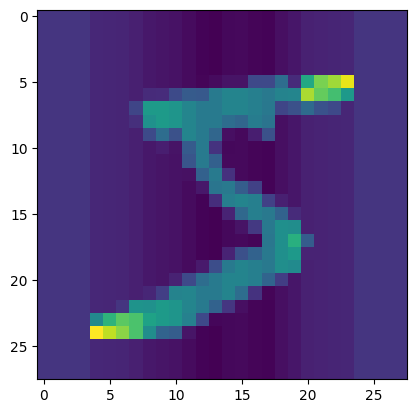

In [ ]:
sscaler = StandardScaler()
sscaler.fit(X_train[0])

newX0s = sscaler.transform(X_train[0])
print(newX0s.shape)
plt.imshow(newX0s)
print(f"np.max(newX0s):{np.max(newX0s)}, np.max(X_train[0]):{np.max(X_train[0])}")

# **Alternative MinMax**

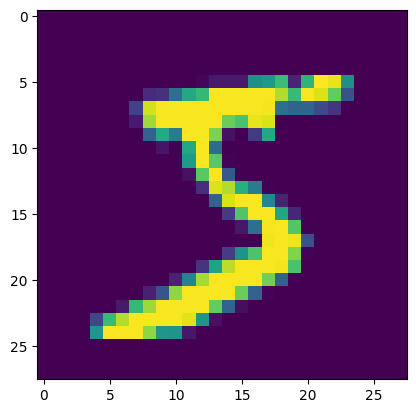

In [ ]:
newX0mm = X_train[0]/np.max(X_train[0])
plt.imshow(newX0mm)

 # **Let's start without normalization**

* ## To feed a CNN we need to **add a dimension**: the number of input channels

In [2]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train = X_train.astype('float32') # to feed keras models we need float32 data
X_test = X_test.astype('float32')
print(f"X_train.shape:{X_train.shape}")
print(f"X_test.shape:{X_test.shape}")
print(f"np.max(X_train):{np.max(X_train)}, np.min(X_train):{np.min(X_train)}")

X_train.shape:(60000, 28, 28, 1)
X_test.shape:(10000, 28, 28, 1)
np.max(X_train):255.0, np.min(X_train):0.0


# **The Conv2D Keras layer**
 * # Allows to create a 2D convolution
 * # Can be added to a Sequential model like any other layer
 * # Link to [docs](https://keras.io/api/layers/convolution_layers/convolution2d/)

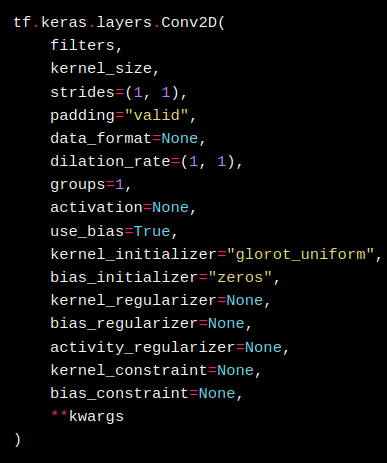

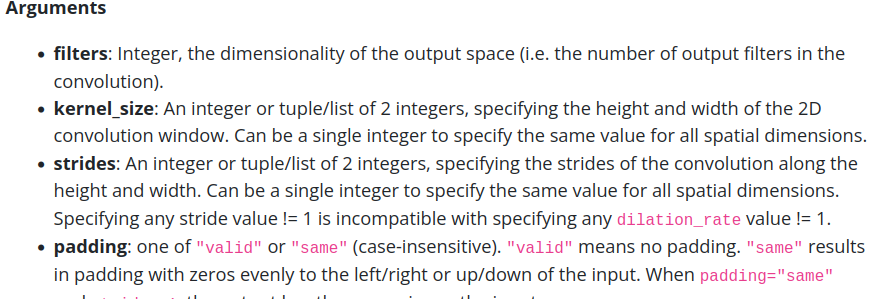

 # **MaxPooling for 2D data**

   * # Creates a max pooling layer
   * # Even this one can be added through the model function add()
   * # Link to [docs](https://keras.io/api/layers/pooling_layers/max_pooling2d/)

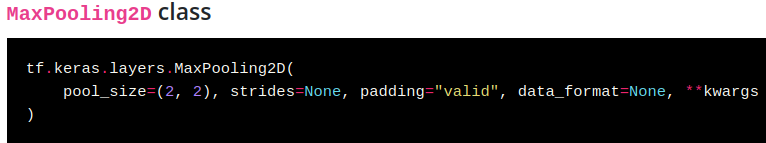




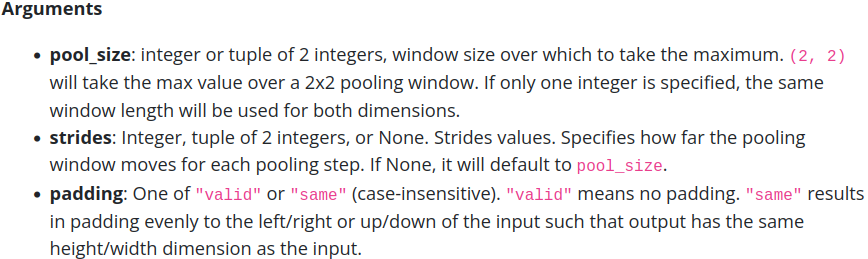

# **Flattening maps**
 * # Use the Keras layer ```Flatten```
 * # Can be added as any Keras layer with the Model method ```add()```
 * # [Docs](https://keras.io/api/layers/reshaping_layers/flatten/)

# **Building the CNN model**


In [3]:
n_classes = len(np.unique(y_train))
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(f"n_classes:{n_classes}, input_shape:{input_shape}")

n_classes:10, input_shape:(28, 28, 1)


In [4]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape = input_shape,
                 padding = "same",
                 activation='relu'))# Input layer
model.add(Conv2D(32, kernel_size=(3,3),
                 padding = "same",
                 activation='relu'))
model.add(Conv2D(16, kernel_size=(2,2),
                 padding = "same",
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # downsizing images
model.add(Flatten()) # flattening output feature maps
model.add(Dense(128, activation='relu')) # adding a Dense layer of 128 neurons with relu
model.add(Dropout(0.2)) #Implementing dropout regularization with p = 0.2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,610 (1.65 MB)

 Trainable params: 431,610 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

None


# **Number of Parameters**
* ### First conv layer: **# parameters** [9(3x3 filter)+1(bias)]*64 = 640
    * #### **feature map dim**: 28x28 (same padding)
* ### Second conv layer: **# parameters**  (9\*64 +1 (bias))\*32 = 18464
    * #### **feature map dim**: 28x28 (same padding)
* ### Third conv layer: **# parameters** (4\*32 +1)\*16 = 2064
    * #### **feature map dim**: 28x28 (same padding)
* ### Max pooling: **# parameters** 0
    * #### **feature map dim**: (I-F)/S +1 = (28-2)/2 +1 = 14 (the default value for stride S is pool_size F)
* ### Flatten size: **# parameters** output size: 14\*14\*16 = 3136
* ### Firse FC layer: **# parameters** (3136+1(bias))\*128 = 401536


# **Training the model**

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 64
epochs = 20
model.fit(x=X_train,y=y_train,
          epochs=epochs,
          batch_size = batch_size)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8370 - loss: 0.7820
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9713 - loss: 0.1017
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9796 - loss: 0.0712
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9851 - loss: 0.0519
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9866 - loss: 0.0441
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9882 - loss: 0.0368
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9906 - loss: 0.0307
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9911 - loss: 0.0307
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9922 - loss: 0.0264
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9923 - loss: 0.0244
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9931 - loss: 0.0231
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/ste

# **Test accuracy**

In [7]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(pred[:5])
pred = np.argmax(pred, axis=1)
print(pred[:5])
print(y_test[:5])

print(f"Test accuracy: {accuracy_score(y_test, pred)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.1193207e-27 9.6468099e-17 1.4598360e-12 1.2601981e-13 1.3576076e-17
  4.0435775e-21 2.1677441e-27 1.0000000e+00 4.1199894e-17 1.6210641e-13]
 [5.4982229e-13 8.0943211e-13 1.0000000e+00 4.1174170e-15 2.1962598e-20
  3.3872170e-23 1.2308759e-14 2.1714000e-14 3.0887329e-13 8.2691126e-20]
 [4.0965404e-19 1.0000000e+00 2.1303123e-13 5.0369881e-18 1.2934569e-19
  9.1977045e-19 6.9851183e-13 2.3839963e-15 4.2294987e-11 2.3077040e-17]
 [1.0000000e+00 1.7257173e-15 1.9092398e-16 5.2776837e-21 2.0435190e-20
  7.8845496e-19 2.1647029e-12 8.5010691e-19 2.3815240e-15 1.7029849e-16]
 [3.5711753e-32 1.0151994e-19 1.4776622e-22 8.1694580e-23 1.0000000e+00
  8.5711066e-20 1.3672978e-21 1.2255456e-19 7.5222597e-14 1.5967221e-11]]
[7 2 1 0 4]
[7 2 1 0 4]
Test accuracy: 0.9878


# **EXERCISE**


> # Create a CNN to classify MNIST images by combining convolutional, pooling and fully connected (FC) layers for classification
1. # Operate a model selection on the number of filters and the filter size to be used in conv layers
   * ### To reduce the degree of freedom, select configurations having approximately the same number of parameters
   * ### For instance, 64 filters of size 3x3 on a single input channel takes (9+1)\*64 = 640 parameters, witha 2x2 filter to get 640 parameters we need to use 128 filters  
2. # Assess the impact of input minmax normalization of images
3. # Once found the best configuration using validation data, try a further model selection on the learning rate alone before merging train and validation data  
